### TIME SERIER

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
train_data2=pd.read_csv('train.csv')

C:\Users\pooji\AppData\Local\Temp\ipykernel_24920\3679546297.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data2=pd.read_csv('train.csv')


In [39]:
train_data2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [40]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [41]:
train_data2['Date']=pd.to_datetime(train_data2['Date'])

In [42]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [85]:
day_sales=train_data2[['Date','Sales']]
day_sales

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


In [86]:
day_sales.isnull().sum()

Date     0
Sales    0
dtype: int64

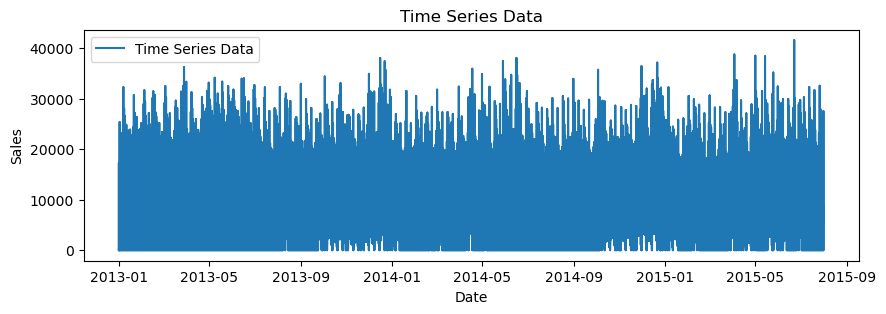

In [53]:
plt.figure(figsize=(10,3))
plt.plot(train_data2['Date'],train_data2['Sales'], label= 'Time Series Data' )
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Data')
plt.legend()
plt.show()

### Time series forcasing using ARIMA(Autoregressive Integrated Moving Average) models Model

### Stationarity Diffencing:

In [90]:
import warnings
warnings.filterwarnings('ignore')

day_sales['Sales_diff']= day_sales['Sales'].diff()

In [91]:
day_sales['Sales_diff']

0             NaN
1           801.0
2          2250.0
3          5681.0
4         -9173.0
            ...  
1017204       0.0
1017205       0.0
1017206       0.0
1017207       0.0
1017208       0.0
Name: Sales_diff, Length: 1017209, dtype: float64

In [92]:
day_sales['Sales_diff'].isnull().sum()

1

In [93]:
day_sales.isnull().sum()

Date          0
Sales         0
Sales_diff    1
dtype: int64

### ACF & PACF plots

In [61]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

### Plot for ACF

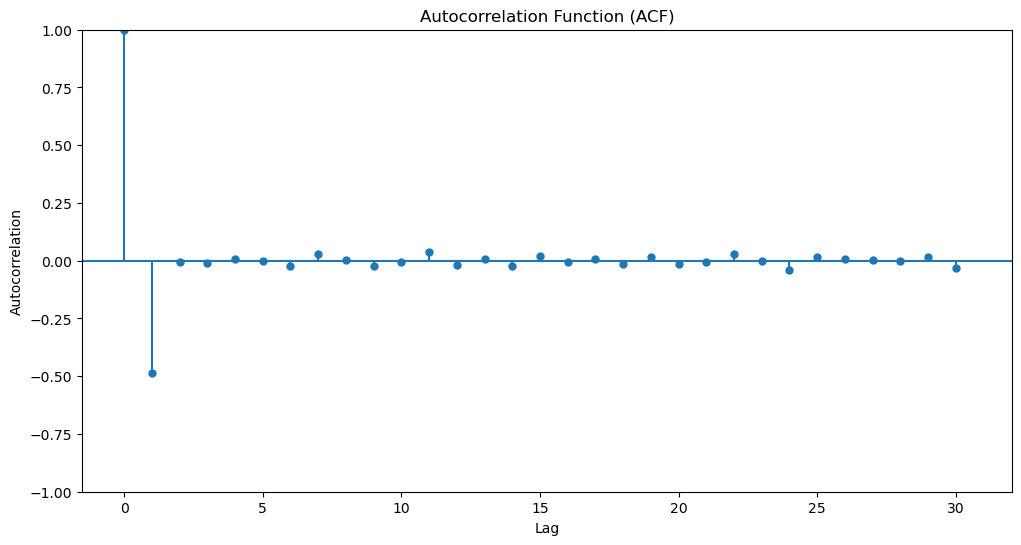

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(day_sales['Sales_diff'].dropna(), lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

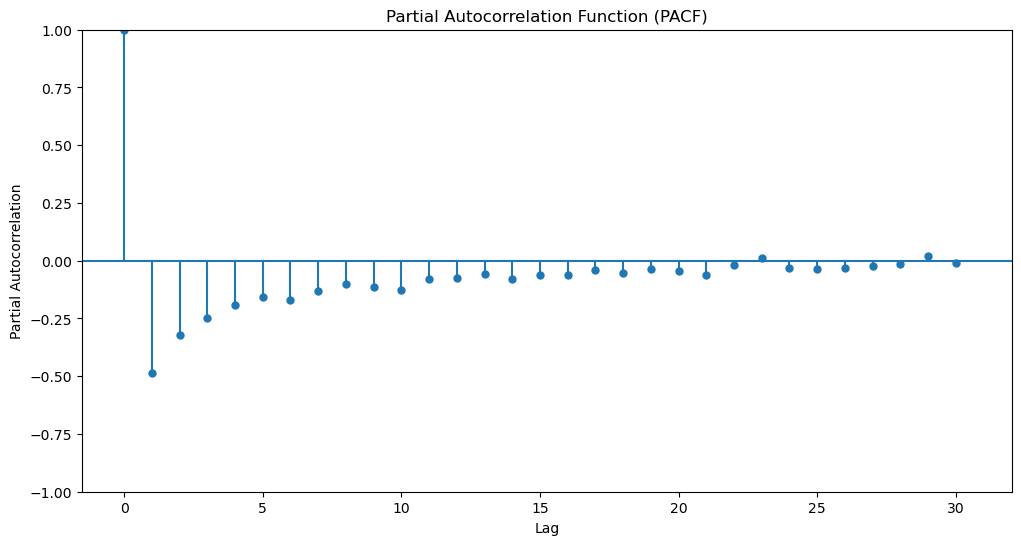

In [95]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(day_sales['Sales_diff'].dropna(), lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [96]:
from statsmodels.tsa.arima.model import ARIMA

#### fit ARIMA model

In [97]:
model = ARIMA(day_sales['Sales'], order=(1,0,1))
model_fit = model.fit()

#### Forecast for next 30 days

In [98]:
forecast = model_fit.forecast(steps=30)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual_values = day_sales['Sales'][-30:]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 309.2726107892619
Mean Squared Error (MSE): 1151439.9505833688
Root Mean Squared Error (RMSE): 1073.0516998650944


In [103]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(actual_values, forecast)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -0.0056516294562147795


#### Plot for Forecast

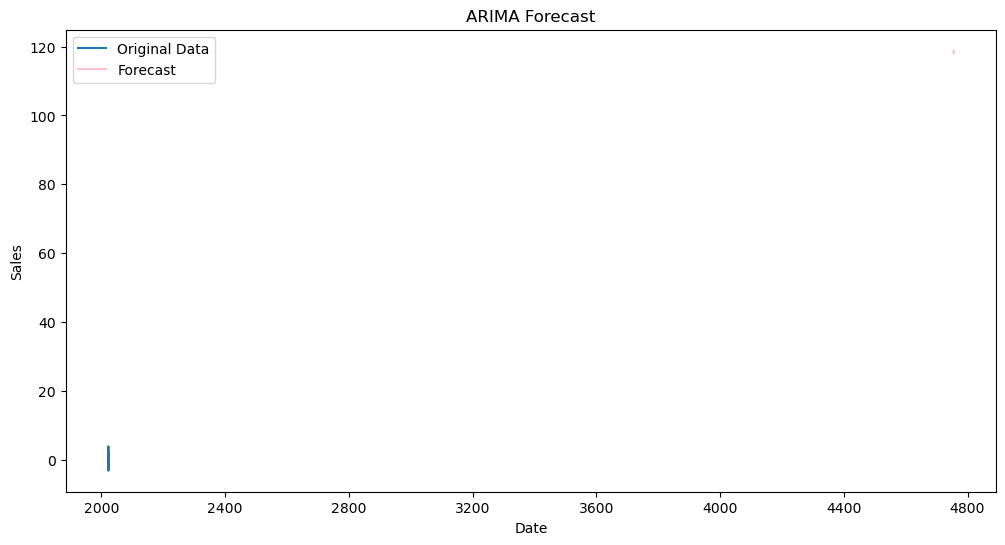

In [104]:
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
day_sales = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# 'forecast' contains the forecasted values generated by the ARIMA model

plt.figure(figsize=(12, 6))
plt.plot(day_sales, label='Original Data')  # Plotting original sales data
plt.plot(forecast, label='Forecast', color='pink')  # Plotting forecasted values
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()